## Q4. K-Mean Clustering Analysis
Problem: Is there a way to group some of the users together to find the best matches?

#### # Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### # Load Dataset

In [5]:
df = pd.read_csv(r"C:\Users\ReDI\Documents\Datasets\New folder (2)\okcupid_profiles_cleaned.csv")
df.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,cancer,no,"english (fluently), spanish (poorly), french (..."
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,has cats,NaN,pisces but it doesn&rsquo;t matter,no,"english, french, c++"
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,20000,student,2012-06-28-14-22,"berkeley, california",doesn't want kids,likes cats,NaN,pisces,no,"english, german (poorly)"
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,likes dogs and likes cats,NaN,aquarius,no,english


#### # Select numerical/Continuous

In [9]:
df1 = df.iloc[:, [0, 10, 11]]
df1.head()

,age,height,income
0,22,75.0,-1
1,35,70.0,80000
2,38,68.0,-1
3,23,71.0,20000
4,29,66.0,-1


###### # Check the shape of the dataset

In [13]:
df1.shape

(59946, 3)

###### # Check the data types of the columns

In [15]:
df1.dtypes

age         int64
height    float64
income      int64
dtype: object

###### # Checking for missing values in df1

In [12]:
print(df1.isnull().sum())

age       0
height    3
income    0
dtype: int64


###### # Drop Null Values

In [16]:
df1_cleaned = df1.dropna()

In [17]:
print(df1_cleaned.isnull().sum())

age       0
height    0
income    0
dtype: int64


In [18]:
df1_cleaned.shape

(59943, 3)

In [20]:
df1 = df1_cleaned
df1

,age,height,income
0,22,75.0,-1
1,35,70.0,80000
2,38,68.0,-1
3,23,71.0,20000
4,29,66.0,-1
...,...,...,...
59941,59,62.0,-1
59942,24,72.0,-1
59943,42,71.0,100000
59944,27,73.0,-1


###### # Statistical Summary of  Features

In [25]:
df1.describe().astype(int)

,age,height,income
count,59943,59943,59943
mean,32,68,20034
std,9,3,97348
min,18,1,-1
25%,26,66,-1
50%,30,68,-1
75%,37,71,-1
max,110,95,1000000


##### Dropping income column. 

In [35]:
df1.drop(columns= 'income', inplace=True)
df1

,age,height
0,22,75.0
1,35,70.0
2,38,68.0
3,23,71.0
4,29,66.0
...,...,...
59941,59,62.0
59942,24,72.0
59943,42,71.0
59944,27,73.0


#### # Users Feature Distributions

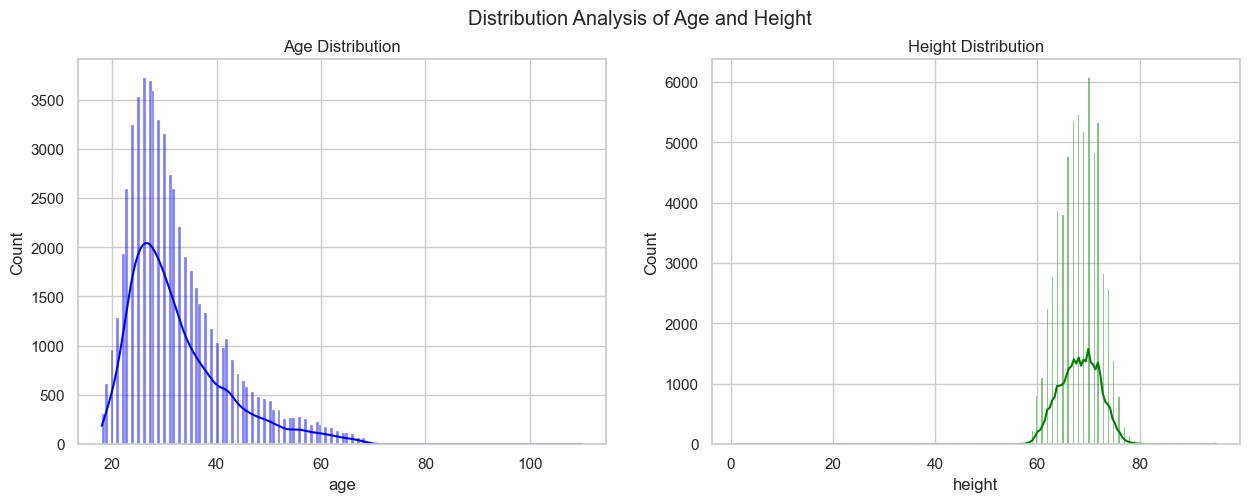

In [49]:
# Set the style of the seaborn plot
sns.set(style='whitegrid')

# Create a figure and axis objects
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot the histograms of age and height side by side
sns.histplot(data=df, x='age', kde=True, color='blue', ax=axs[0])
sns.histplot(data=df, x='height', kde=True, color='green', ax=axs[1])

# Set the titles of the plots
axs[0].set_title('Age Distribution')
axs[1].set_title('Height Distribution')

# Set the title for the entire plot
fig.suptitle('Distribution Analysis of Age and Height')

# Display the plots
plt.show()

#### # Standardizing or normalizing the features

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Initialize the StandardScaler
standardized_data = scaler.fit_transform(df1) # Fit and transform the data using the scaler


#### # New DataFrame with standardized data

In [51]:
df_standardized = pd.DataFrame(standardized_data, columns=['age', 'height'])
df_standardized


,age,height
0,-1.093889,1.713846
1,0.281388,0.432354
2,0.598759,-0.080243
3,-0.988098,0.688652
4,-0.353355,-0.592840
...,...,...
59938,2.820360,-1.618033
59939,-0.882308,0.944951
59940,1.021921,0.688652
59941,-0.564936,1.201249


###### The above dataframe shows the transformed data

##### # Determine the Centroid(number of Clusters)
###### Finding the optimal number of clusters

##### - Elbow Method
###### The Elbow Method helps by running K-means with different numbers of clusters and plotting the resulting scores. 
###### The point where the score begins to decrease more slowly (the “elbow”) is considered the optimal number of clusters.

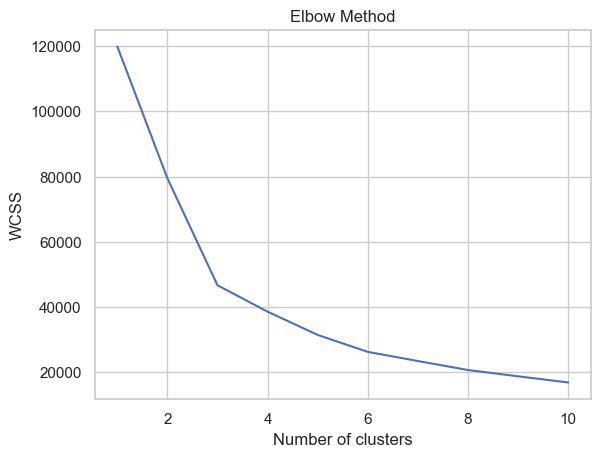

In [60]:
features = df_standardized[['age', 'height']]

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

###### In simpler terms, the KMeans model with 5 clusters is a way of grouping our data into 5 distinct categories or “clusters” .
###### The number 5 is chosen based on the Elbow Method above.

##### # Fitting the Model

In [63]:
# Create the KMeans model with the optimal number of clusters (assumed to be 5 based on the elbow method)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)

# Fit the model to the data and predict the cluster labels
labels = kmeans.fit_predict(features)

# Add the cluster labels to the dataframe
df_standardized['Cluster'] = labels

# Display the first few rows of the dataframe with the cluster labels
df_standardized

,age,height,Cluster
0,-1.093889,1.713846,4
1,0.281388,0.432354,2
2,0.598759,-0.080243,2
3,-0.988098,0.688652,4
4,-0.353355,-0.592840,3
...,...,...,...
59938,2.820360,-1.618033,0
59939,-0.882308,0.944951,4
59940,1.021921,0.688652,2
59941,-0.564936,1.201249,4


#### # Understanding the Cluster Characteristics
#### for each cluster by calculating the mean values of ‘age’, and 'height' for each cluster.

In [64]:
df2 = df_standardized

# Calculate the mean values of Age, Annual Income, and Score for each cluster
cluster_means = df2.groupby('Cluster')[
['age', 'height']].mean().astype(int)

# Display the cluster means
cluster_means

,age,height
Cluster,,
0,2,0
1,0,-1
2,0,0
3,0,0
4,0,1


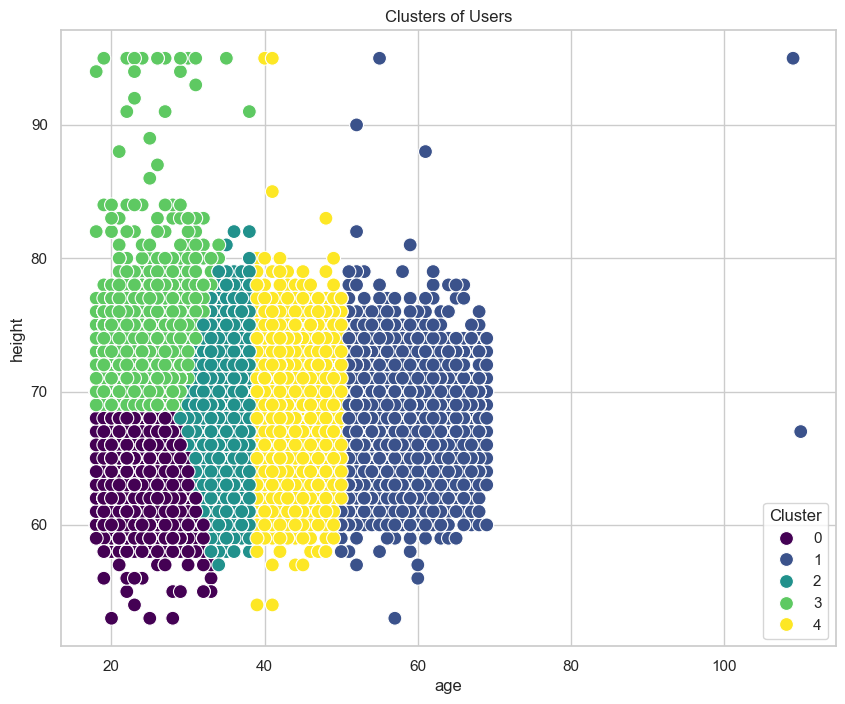

In [69]:
# Create a scatter plot of 'Annual Income (k$)' vs 'Spending Score (1-100)' colored by 'Cluster'
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df1, x='age', y='height', hue='Cluster', palette='viridis', s=100)

# Add a title to the plot
plt.title('Clusters of Users')

# Display the plot
plt.show()

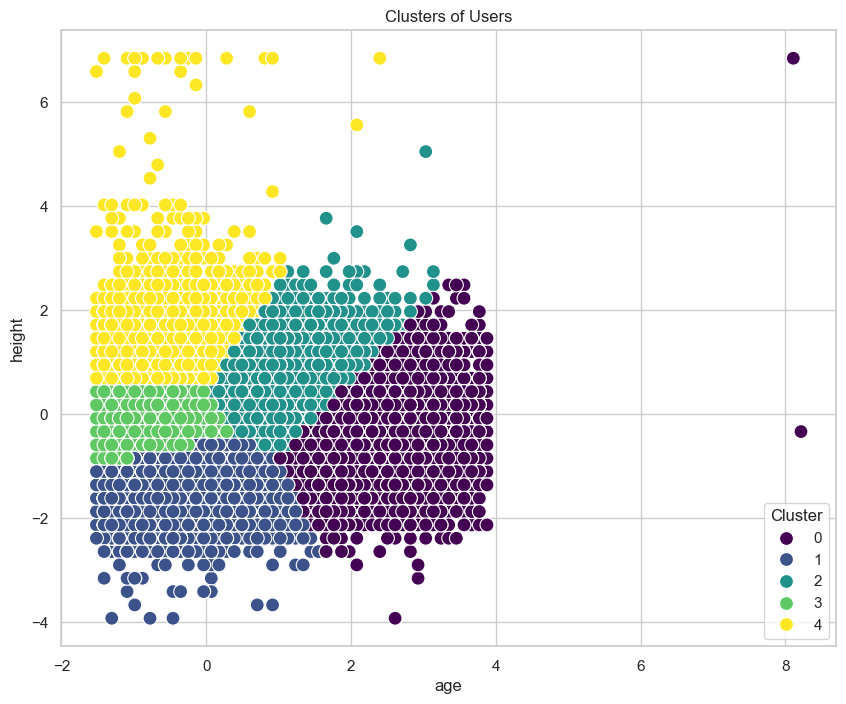

In [70]:
# Create a scatter plot of 'Annual Income (k$)' vs 'Spending Score (1-100)' colored by 'Cluster'
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df2, x='age', y='height', hue='Cluster', palette='viridis', s=100)

# Add a title to the plot
plt.title('Clusters of Users')

# Display the plot
plt.show()